In [1]:
import os
os.environ['TRANSFORMERS_OFFLINE'] = '1'
import torch
from transformers import AutoTokenizer
from models import DecoderOnlyTransformer
from config import *
from utils import *

In [2]:
tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')
config = SimpleDecoderOnlyTransformerConfig(vocab_size = tokenizer.vocab_size)

config_check(config)
model = DecoderOnlyTransformer(config).to(config.device)
model.load_state_dict(torch.load('ckpts/DecoderOnlyTransformer.pth', weights_only=True), strict=False)
model.apply_attention_map()

CONFIG:SimpleDecoderOnlyTransformerConfig {
  "device": "cuda",
  "dropout": 0.1,
  "eps": 1e-06,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "max_seq_len": 64,
  "model_type": "simple_decoder_only_transformer",
  "n_layers": 12,
  "num_attention_heads": 12,
  "transformers_version": "4.46.1",
  "vocab_size": 30522
}



Model Parameters: 131,966,778


In [3]:
# GENERATE_CONFIG['temperature'] = 0.75
# GENERATE_CONFIG['greedy'] = False

context = "the finance ministry"
input_idx = tokenizer(context, return_tensors='pt')['input_ids'][:, 1:-1].repeat(5, 1).to(config.device)
# input_idx = tokenizer(context, return_tensors='pt')['input_ids'].repeat(5, 1).to(config.device)
generated_idx = model.generate(input_idx, max_new_tokens=50, temperature=0.7)
generated_text = [''.join(tokenizer.decode(x)) for x in generated_idx.tolist()]
generated_text

['the finance ministry officials say as knowledge emerged as turning the country to counter - - - - driven mainly driven by muslim woman to become a one month - age and slow veteran right - lrb - lrb - lhassanjan half an imminent reined late bargain',
 "the finance ministry official internet clean hands amp ; < unim denouncing relatives of postal worker as an immigrant bloodbatic earthquake - era on thursday announced as a seven months ago turning the same - lhasa ' s own hands in the hands while on new",
 'the finance ministry said as having been ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` `',
 'the finance ministry official internet clean hands gave details of more than # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #',
 'the finance ministry official internet capital market reforms to counterfeiting new york and only one month - - age and hands have been issued an hour for an immigrant part of indonesian 

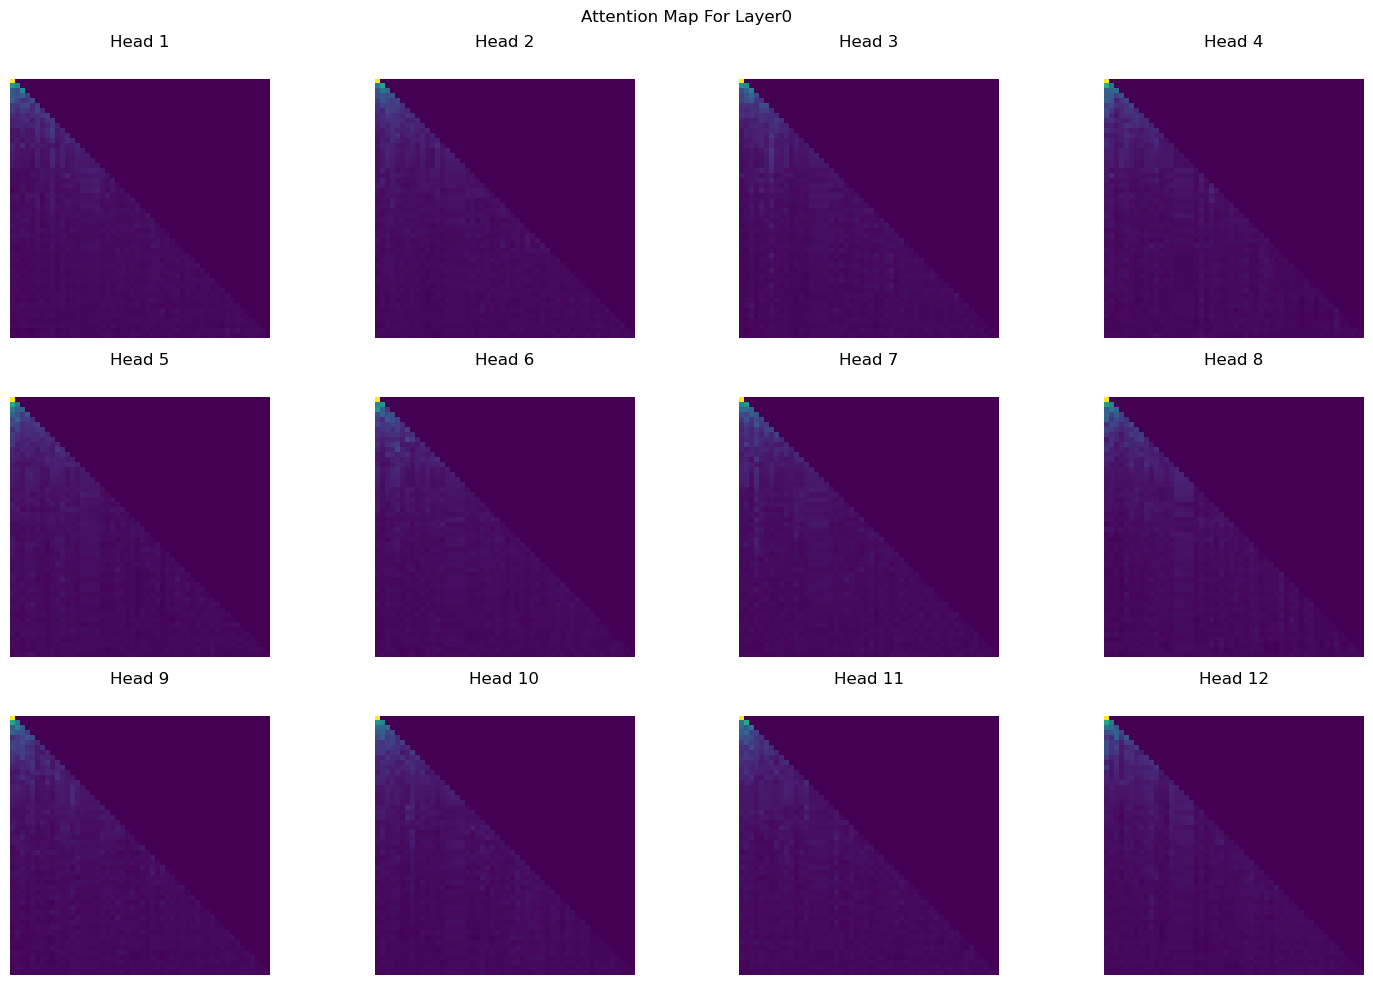

In [ ]:
plot_attention(model, layer=0, batch_idx=0)